In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from sklearn.externals import joblib

% matplotlib inline

Using TensorFlow backend.


In [3]:
train_df = pd.read_csv("~/real_estate/data/v5/final/yelp/yelp_train_df.csv")
test_df = pd.read_csv("~/real_estate/data/v5/final/yelp/yelp_test_df.csv")
test_df = test_df.loc[test_df["target"] != -5]
train_df = train_df.loc[train_df["target"] != -5]

features = train_df.columns[:-2]

X_train = train_df[features]
X_test = test_df[features]
y_train = train_df["target"]
y_test = test_df["target"]

In [10]:
# compile DNN
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=68))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Run DNN
model.fit(X_train, y_train, epochs=4, batch_size=1)

Epoch 1/5
20696/20696 [==============================] - 35s 2ms/step - loss: 0.0067
Epoch 2/5
20696/20696 [==============================] - 36s 2ms/step - loss: 0.0057
Epoch 3/5
20696/20696 [==============================] - 33s 2ms/step - loss: 0.0055
Epoch 4/5
20696/20696 [==============================] - 33s 2ms/step - loss: 0.0054
Epoch 5/5
20696/20696 [==============================] - 34s 2ms/step - loss: 0.0052


In [11]:
# Get predictions and errors
y_train_hat = model.predict(X_train).reshape(1, -1)
y_test_hat = model.predict(X_test).reshape(1, -1)

errors_train = abs(y_train_hat - y_train.values)
errors_test = abs(y_test_hat - y_test.values)

print("Mean test error: ", np.mean(errors_test))
print("Mean test value: ", np.mean(y_test))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat)[0,1]))
print('---')
print("Mean train error: ", np.mean(errors_train))
print("Mean train value: ", np.mean(y_train))
print("R^2 train: ", np.square(np.corrcoef(y_train, y_train_hat)[0,1]))

Mean test error:  0.05387462177265246
Mean test value:  0.09950767659531681
R^2 test:  0.32594292886002274
---
Mean train error:  0.05373835436922135
Mean train value:  0.04422868195791466
R^2 train:  0.5395780375998211


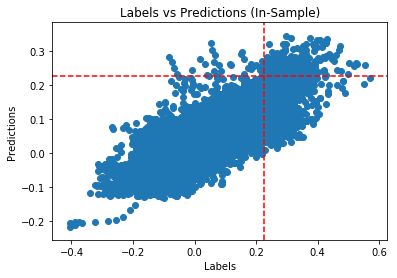

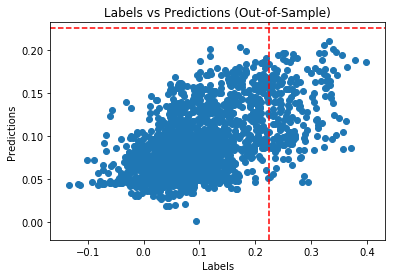

In [9]:
plt.scatter(y_train, y_train_hat)
plt.title("Labels vs Predictions (In-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.225, color="red", linestyle='--')
plt.axhline(y=0.225, color="r", linestyle='--')
plt.show()

plt.scatter(y_test, y_test_hat)
plt.title("Labels vs Predictions (Out-of-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.225, color="red", linestyle='--')
plt.axhline(y=0.225, color="r", linestyle='--')
plt.show()